In [25]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
x = torch.randn(1, 1, 192, 224).view(-1)

In [3]:
sorted_indices = torch.sort(x)[1]

In [20]:
lower_percentile = 0.1
upper_percentile = 0.9
num_brain_voxels = len(sorted_indices)

lower_index = int(lower_percentile*num_brain_voxels)
upper_index = int(upper_percentile*num_brain_voxels)

retained_indices = sorted_indices[lower_index:upper_index]

In [21]:
retained_voxels = x[retained_indices]

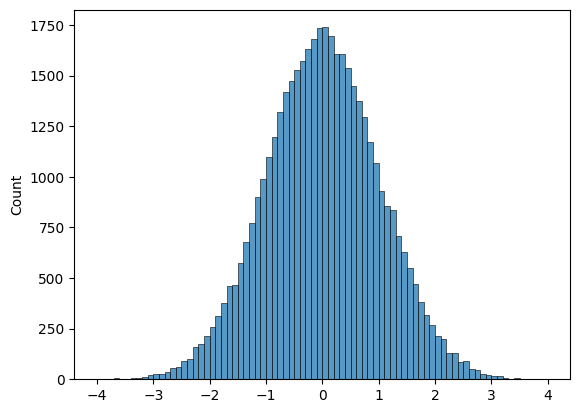

In [22]:
sns.histplot(x, binwidth=0.1, binrange=(-4,4));

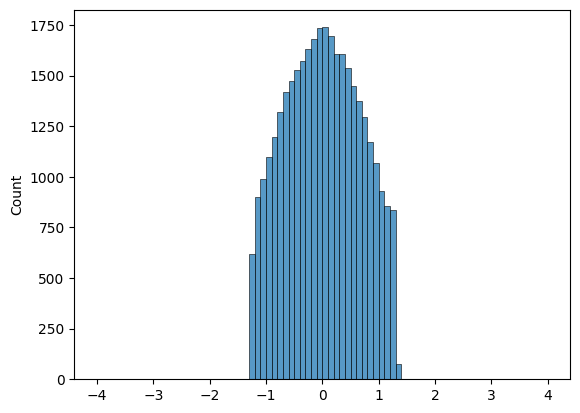

In [23]:
sns.histplot(retained_voxels, bins=100, binwidth=0.1, binrange=(-4,4));

In [27]:
y = torch.randn(1, 1, 192, 224)
np.array(y).flatten()

array([ 1.7095304 , -0.36749882,  0.03413193, ..., -0.2837109 ,
        0.2637891 , -0.3477618 ], dtype=float32)

In [28]:
np.sort(y)

array([[[[-2.431201 , -2.3032362, -2.2111382, ...,  2.040181 ,
           2.1294339,  3.3826501],
         [-2.392254 , -2.327312 , -2.2324433, ...,  2.5618064,
           2.5643883,  2.8536284],
         [-2.9448483, -2.301018 , -2.2091208, ...,  2.055378 ,
           2.063945 ,  2.16274  ],
         ...,
         [-2.2371404, -2.1201797, -2.0412817, ...,  2.058506 ,
           2.152604 ,  2.5187771],
         [-2.5889597, -2.1598094, -2.0384164, ...,  2.527388 ,
           2.8343701,  2.983317 ],
         [-3.0966444, -2.598063 , -2.0989535, ...,  2.10443  ,
           2.5386915,  2.94973  ]]]], dtype=float32)

In [29]:
np.argsort(y)

tensor([[[[101,  24, 222,  ...,  88, 221,  20],
          [151, 180, 206,  ..., 208,  76,  92],
          [ 45,  70,   3,  ..., 107,   2,  79],
          ...,
          [216,  39, 184,  ...,  46, 111,  16],
          [222,  84, 134,  ..., 219,  64, 115],
          [145, 173, 106,  ..., 139, 199,  92]]]])

In [30]:
from ulw_data.preprocessing.normalize_brain import normalize_brain

In [150]:
def normalize_brain2(image, mask, lower_percentile=0, upper_percentile=100):
    image = image.copy()
    brain_locs = image[mask]
    
    if lower_percentile > 0 or upper_percentile < 100:
        brain_locs = brain_locs.flatten()
        sorted_indices = np.argsort(brain_locs)
        num_brain_voxels = len(sorted_indices)
        #print(num_brain_voxels)

        lower_index = int(lower_percentile*num_brain_voxels)
        upper_index = int(upper_percentile*num_brain_voxels)

        retained_indices = sorted_indices[lower_index:upper_index]
        #print(len(retained_indices)/num_brain_voxels)
        
        brain_locs = brain_locs[lower_index:upper_index]

    mean = np.mean(brain_locs)
    std = np.std(brain_locs)
    
    print(mean, std)

    image[mask] = (image[mask] - mean) / std

    return image

In [151]:
x = np.random.randn(224, 160)
mask = np.ones((224, 160), dtype=bool)

In [152]:
np.mean(x[mask])

-0.0007902402325987637

In [154]:
standard = normalize_brain2(x, mask, 0, 100)
clipped = normalize_brain2(x, mask, 0.1, 0.9)

-0.0007902402325987637 1.0071872139971147
35840
0.8
-0.003914626344839348 1.007618646327144


In [49]:
standard.flatten().shape

(35840,)

<Axes: ylabel='Count'>

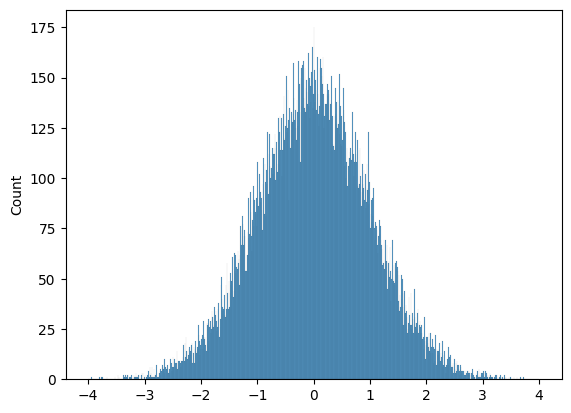

In [51]:
sns.histplot(standard.flatten(), binwidth=0.01, binrange=(-4,4))

<Axes: ylabel='Count'>

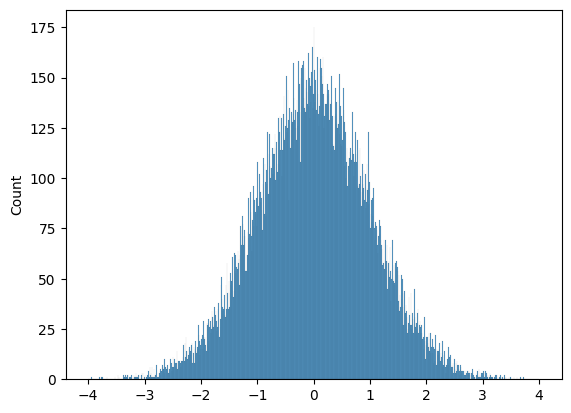

In [50]:
sns.histplot(clipped.flatten(), binwidth=0.01, binrange=(-4,4))